In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time

%matplotlib inline

np.random.seed(42)

Read S3C files created by Sam and Siegfried.

In [2]:
DATA_DIR = "../data"
S3C_files = sorted(glob.glob(os.path.join(DATA_DIR, "s3c","*.dat.csv")))
print(S3C_files)

['../data/s3c/S0.dat.csv', '../data/s3c/S1_00.dat.csv', '../data/s3c/S1_01.dat.csv', '../data/s3c/S1_02.dat.csv', '../data/s3c/S1_03.dat.csv', '../data/s3c/S1_04.dat.csv', '../data/s3c/S1_05.dat.csv', '../data/s3c/S1_06.dat.csv', '../data/s3c/S1_07.dat.csv', '../data/s3c/S1_08.dat.csv', '../data/s3c/S1_09.dat.csv', '../data/s3c/S1_10.dat.csv', '../data/s3c/S1_11.dat.csv', '../data/s3c/S1_12.dat.csv', '../data/s3c/S1_13.dat.csv', '../data/s3c/SR.dat.csv', '../data/s3c/SS.dat.csv', '../data/s3c/ST.dat.csv', '../data/s3c/St5.dat.csv']


In [3]:
simulated_observations = []
for f in S3C_files:
    simulated_observations.append(pd.read_csv(f))
    
simulated_observations = pd.concat(simulated_observations)
simulated_observations.sort_values(
    by=["FieldMJD"],
    inplace=True,
)
simulated_observations.reset_index(
    inplace=True,
    drop=True
)
len(simulated_observations)

102658740

Calculate H magnitude, then only keep objects with H magnitude >= 15. 

In [4]:
simulated_observations["H"] = simulated_observations["V"] - simulated_observations["V(H=0)"]
simulated_observations = simulated_observations[(simulated_observations["H"] >= 15)]
len(simulated_observations)

96764294

In [5]:
simulated_observations.head()

,ObjID,observationId,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),...,Ast-Sun(J2000z)(km),Sun-Ast-Obs(deg),V,Filtermag,V(H=0),Filter,AstRASigma(mas),AstDecSigma(mas),PhotometricSigma(mag),H
0,S00000pWa,0,59853.985644,1.806609e+08,12.121,293.446584,0.083468,3.515836,-0.215819,2.198797e+08,...,1.984291e+07,33.042024,21.648,21.247,3.032,z,84.473821,84.473821,0.100685,18.616
2,S1004031a,0,59853.985644,3.110664e+08,17.909,294.549169,0.083839,3.907008,-0.055772,2.770707e+08,...,2.995922e+07,21.992433,20.471,20.070,4.691,z,31.381618,31.381618,0.036783,15.780
4,S1005Q41a,0,59853.985644,3.025812e+08,14.915,294.380587,0.115228,4.948851,-0.170362,2.725697e+08,...,3.486658e+07,22.510926,21.140,20.739,4.600,z,54.255349,54.255349,0.065081,16.540
5,S1006EoLa,0,59853.985644,3.071102e+08,18.868,293.816822,0.160728,5.583638,-0.124058,2.715580e+08,...,3.864541e+07,22.382624,21.216,20.918,4.646,z,63.301350,63.301350,0.075902,16.570
7,S10051Uoa,0,59853.985644,3.370582e+08,14.117,294.847477,0.066844,4.069567,-0.117317,2.894072e+08,...,3.268421e+07,20.552948,22.297,21.896,4.957,z,151.075080,151.075080,0.174751,17.340


Read MPC files created by Sam and Siegfried. 

In [6]:
#### TODO ####

Take first 20 days of observations (will reduce to 15 later).

In [7]:
simulated_observations = simulated_observations[
    (simulated_observations["FieldMJD"] >= simulated_observations["FieldMJD"].min())
    & (simulated_observations["FieldMJD"] < simulated_observations["FieldMJD"].min() + 20)]
len(simulated_observations)

5765314

In [8]:
simulated_observations

,ObjID,observationId,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),...,Ast-Sun(J2000z)(km),Sun-Ast-Obs(deg),V,Filtermag,V(H=0),Filter,AstRASigma(mas),AstDecSigma(mas),PhotometricSigma(mag),H
0,S00000pWa,0,59853.985644,1.806609e+08,12.121,293.446584,0.083468,3.515836,-0.215819,2.198797e+08,...,1.984291e+07,33.042024,21.648,21.247,3.032,z,84.473821,84.473821,0.100685,18.616
2,S1004031a,0,59853.985644,3.110664e+08,17.909,294.549169,0.083839,3.907008,-0.055772,2.770707e+08,...,2.995922e+07,21.992433,20.471,20.070,4.691,z,31.381618,31.381618,0.036783,15.780
4,S1005Q41a,0,59853.985644,3.025812e+08,14.915,294.380587,0.115228,4.948851,-0.170362,2.725697e+08,...,3.486658e+07,22.510926,21.140,20.739,4.600,z,54.255349,54.255349,0.065081,16.540
5,S1006EoLa,0,59853.985644,3.071102e+08,18.868,293.816822,0.160728,5.583638,-0.124058,2.715580e+08,...,3.864541e+07,22.382624,21.216,20.918,4.646,z,63.301350,63.301350,0.075902,16.570
7,S10051Uoa,0,59853.985644,3.370582e+08,14.117,294.847477,0.066844,4.069567,-0.117317,2.894072e+08,...,3.268421e+07,20.552948,22.297,21.896,4.957,z,151.075080,151.075080,0.174751,17.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118384,S00001sva,14675,59873.376132,4.340555e+07,-3.401,79.008160,0.419183,-38.154089,0.570708,1.384531e+08,...,6.572865e+05,55.733902,19.768,19.513,-0.398,r,10.417228,10.417228,0.005746,20.166
6118385,St5005Dba,14676,59873.376589,7.790901e+08,-8.338,81.468789,-0.052035,-40.104270,-0.127393,2.203461e+08,...,-4.744020e+08,9.767769,23.178,23.006,7.958,r,48.753265,48.753265,0.090084,15.220
6118387,St500gSXa,14676,59873.376589,6.491902e+08,-6.556,79.273669,-0.050160,-41.483500,-0.154871,2.224611e+08,...,-4.025537e+08,11.481198,23.615,23.443,7.275,r,71.391078,71.391078,0.130921,16.340
6118388,St500m55a,14678,59873.377496,6.062892e+08,-5.253,75.506983,-0.060213,-41.770454,-0.168992,2.451075e+08,...,-3.764048e+08,11.965248,23.798,23.626,7.028,r,85.673357,85.673357,0.154636,16.770


Calculate the night of observation.

In [9]:
def calcNight(mjd, midnight=0.166):
    night = mjd + 0.5 - midnight
    return night.astype(int)

simulated_observations["night"] = calcNight(simulated_observations["FieldMJD"])

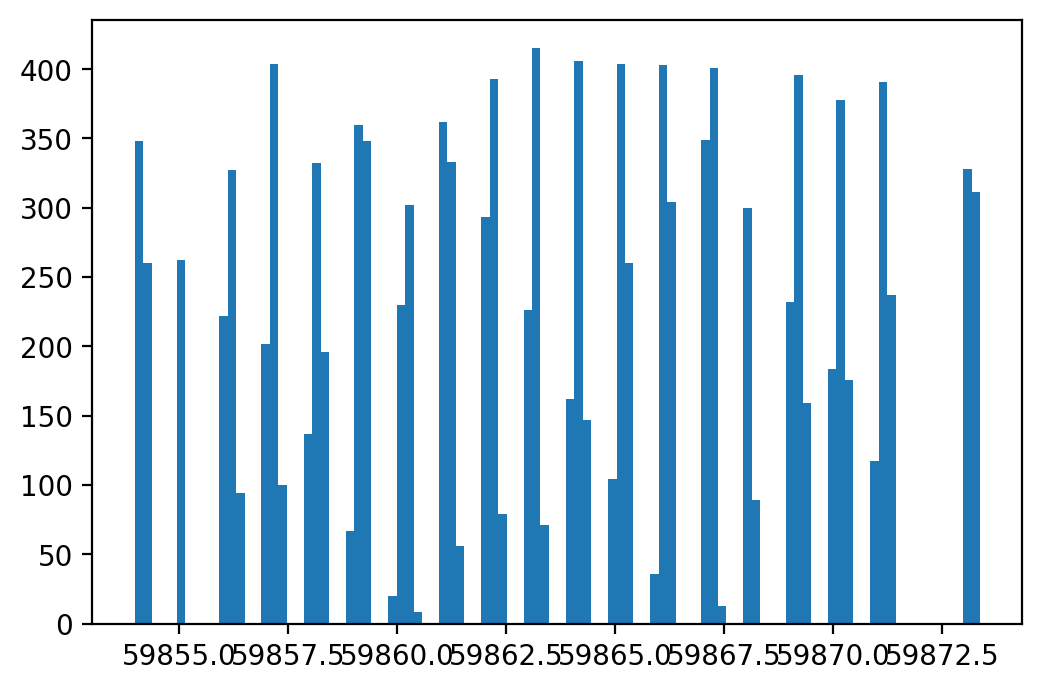

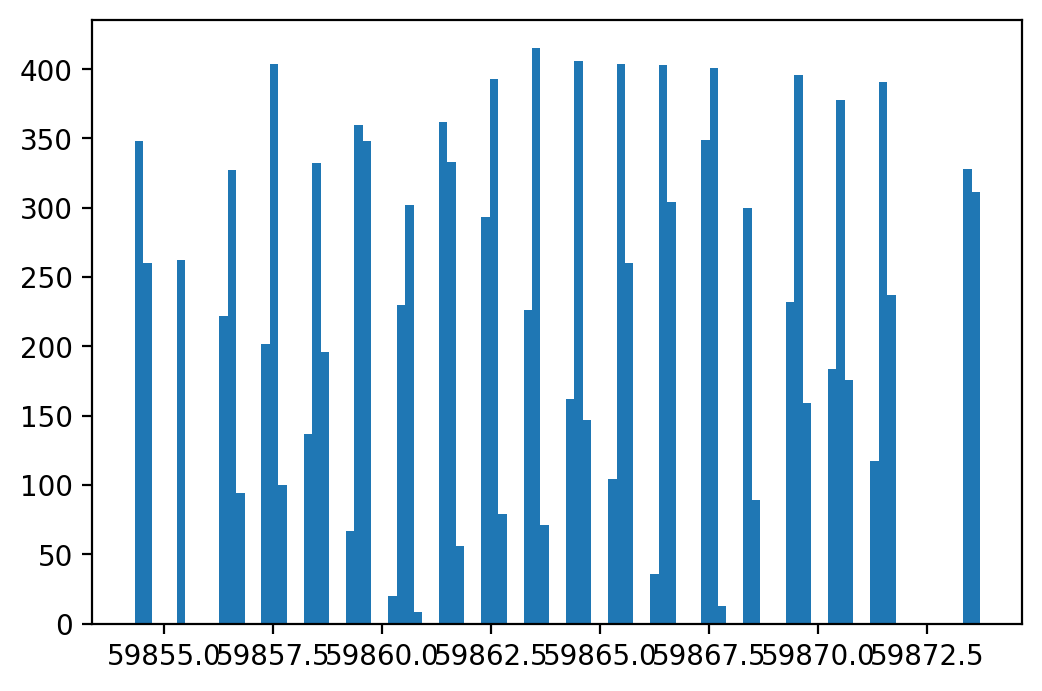

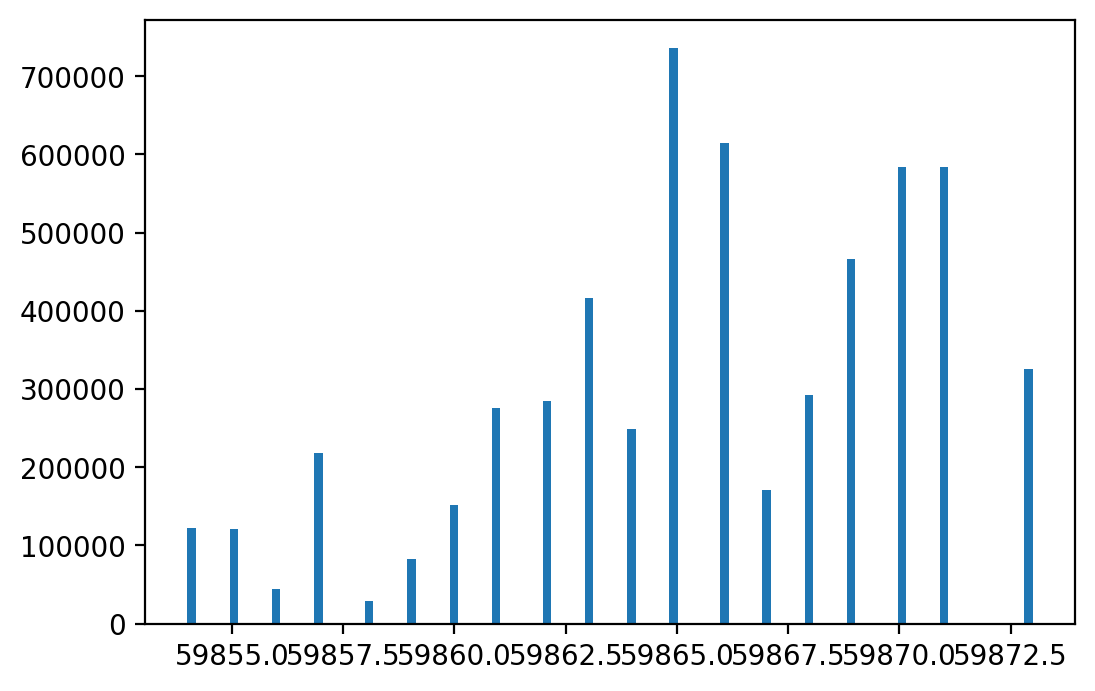

In [10]:
fig, ax = plt.subplots(1, 1, dpi=200)
values, bins, artists = ax.hist(simulated_observations["FieldMJD"].unique(), bins=100)

fig, ax = plt.subplots(1, 1, dpi=200)
values, bins, artists = ax.hist(simulated_observations["FieldMJD"].unique() + 0.5 - 0.166, bins=100)

fig, ax = plt.subplots(1, 1, dpi=200)
values, bins, artists = ax.hist(simulated_observations["night"].values, bins=100)

Keep only the first 15 nights of observations.

In [11]:
simulated_observations = simulated_observations[
    (simulated_observations["night"] >= simulated_observations["night"].min())
    & (simulated_observations["night"] < (simulated_observations["night"].min() + 15))
].copy()
len(simulated_observations)

3805364

Add random error to the sky-plane positions.

In [12]:
simulated_observations.loc[:, "AstRA(deg)"] = np.random.normal(
    loc=simulated_observations["AstRA(deg)"].values, 
    scale=simulated_observations["AstRASigma(mas)"].values/(1e3*3600) / np.cos(np.radians(simulated_observations["AstDec(deg)"].values))
)
simulated_observations.loc[:, "AstDec(deg)"] = np.random.normal(
    loc=simulated_observations["AstDec(deg)"].values, 
    scale=simulated_observations["AstDecSigma(mas)"].values/(1e3*3600)
)

ADES expects rmsRAcosDec.

In [13]:
simulated_observations.loc[:, "AstRASigma(mas)"] *= np.cos(np.radians(simulated_observations["AstDec(deg)"].values))

ADES expects errors in arcseconds.

In [14]:
simulated_observations["AstRASigma(arcsec)"] = simulated_observations["AstRASigma(mas)"].values / 1e3
simulated_observations["AstDecSigma(arcsec)"] = simulated_observations["AstDecSigma(mas)"].values / 1e3

Make sure observation IDs are unique.

In [15]:
simulated_observations["observationId"] = ["obs{:08d}".format(i) for i in range(len(simulated_observations))]

Add observatory code, observation type, astrometric catalog, etc...

In [16]:
simulated_observations["stn"] = ["I11" for i in range(len(simulated_observations))]
simulated_observations["mode"] = ["CCD" for i in range(len(simulated_observations))]
simulated_observations["astCat"] = ["GAIA-DR2" for i in range(len(simulated_observations))]

Rename some columns to fit names expected by ADES. 

In [17]:
simulated_observations.rename(
    columns={
        "observationId" : "obs_id",
        "ObjID" : "obj_id",
        "FieldMJD" : "mjd_utc",
        "AstRA(deg)" : "ra",
        "AstDec(deg)" : "dec",
        "AstRASigma(arcsec)" : "rmsRA", 
        "AstDecSigma(arcsec)" : "rmsDec",
        "Filter" : "band",
        "Filtermag" : "mag",
        "PhotometricSigma(mag)" : "rmsMag",
    },
    inplace=True
)

Keep only the relevant columns.

In [18]:
simulated_observations = simulated_observations[[
    "obs_id",
    "obj_id",
    "mjd_utc",
    "ra",
    "dec",
    "rmsRA",
    "rmsDec",
    "band",
    "mag",
    "rmsMag",
    "stn",
    "mode",
    "astCat",
    "night",
]]

In [20]:
simulated_observations.to_csv(
    os.path.join(DATA_DIR, "observations.txt"), 
    index=False, 
    sep=" "
)